Again, on the same dataset. Cluster similar houses together.

Data cleaning & getting rid of irrelevant information before clustering

Finding the optimal value of k

Storing cluster to which the house belongs along with the data

In [1]:
import pandas as pd
import numpy as np

In [2]:
#loading the dataet
df=pd.read_csv(r"C:\Users\dell\Downloads\house_rental_data.csv.txt")
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


Data cleaning & getting rid of irrelevant information before clustering

In [3]:
df.isnull().sum()

Unnamed: 0     0
Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [5]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
df.dropna(inplace=True) # remove rows containing missing value

scaling data to bring all variables in same range


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)


Finding the optimal value of k

C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\User

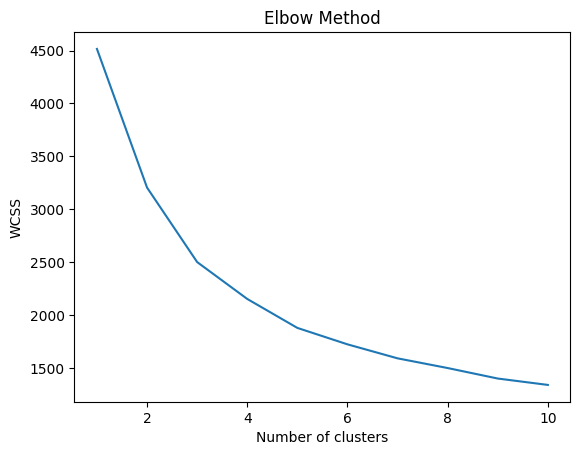

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


WE CAN OBSERVE ELBOW AT 3. THEREFORE VALUE UF k IS 3

In [11]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(df_scaled)
cluster_labels = kmeans.labels_


C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Storing cluster to which the house belongs along with the data

In [12]:
df['Cluster'] = cluster_labels
df.head()


,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,Cluster
0,1177.698,2,7,2,2,2,62000,2
1,2134.800,5,7,4,2,2,78000,2
2,1138.560,5,7,2,2,1,58000,1
3,1458.780,2,7,3,2,2,45000,2
4,967.776,11,14,3,2,2,45000,2
